In [1]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


Dataset Loaded!
   student_id  weekly_self_study_hours  attendance_percentage  \
0           1                     18.5                   95.6   
1           2                     14.0                   80.0   
2           3                     19.5                   86.3   
3           4                     25.7                   70.2   
4           5                     13.4                   81.9   

   class_participation  total_score grade  
0                  3.8         97.9     A  
1                  2.5         83.9     B  
2                  5.3        100.0     A  
3                  7.0        100.0     A  
4                  6.9         92.0     A  
Class distribution:
 Pass
1    732580
0    267420
Name: count, dtype: int64

Accuracy: 0.826675

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.88      0.73     53484
           1       0.95      0.81      0.87    146516

    accuracy                           0.83 

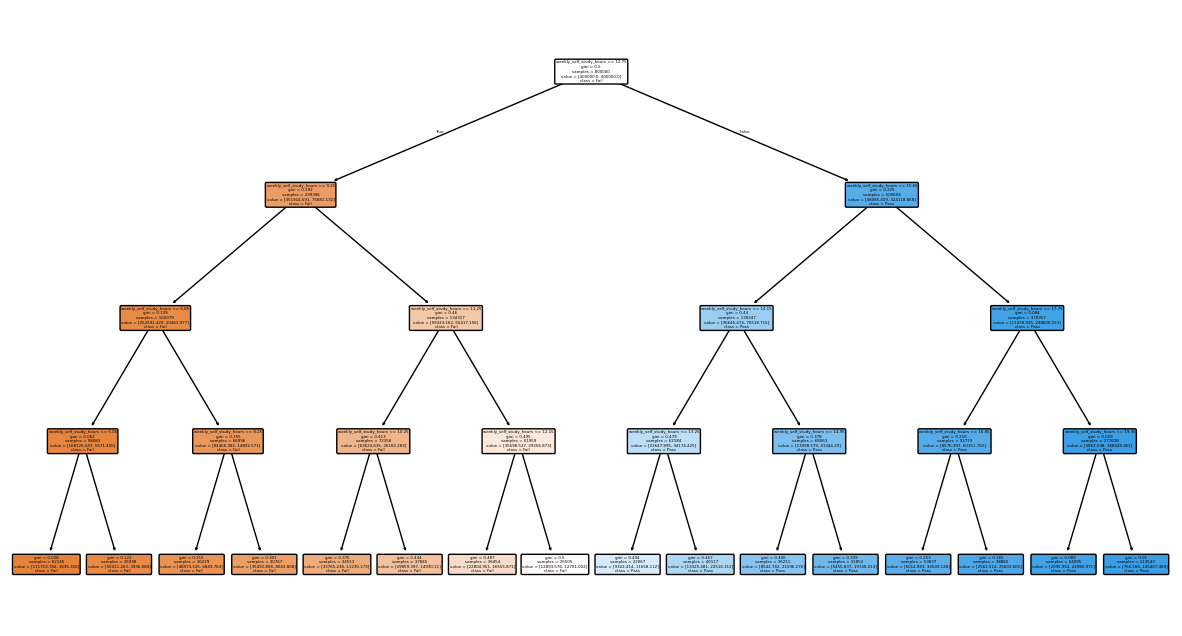


Feature Importance:
weekly_self_study_hours: 1.000
attendance_percentage: 0.000
class_participation: 0.000


In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv("student_performance.csv")  # replace with your CSV path
print("Dataset Loaded!")
print(df.head())

# Preprocess
# Create Pass/Fail based on total_score >= 50
df['Pass'] = df['total_score'].apply(lambda x: 1 if x >= 75 else 0)

# Select features
features = ['weekly_self_study_hours', 'attendance_percentage', 'class_participation']
X = df[features]
y = df['Pass']

#Check Balance
print("Class distribution:\n", y.value_counts())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Build Decision Tree
dt_model = DecisionTreeClassifier(
    max_depth=4,
    class_weight='balanced',
    random_state=42
)

dt_model.fit(X_train, y_train)

# Predictions
y_pred = dt_model.predict(X_test)

# Evaluate
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize Tree
plt.figure(figsize=(15,8))
plot_tree(
    dt_model,
    feature_names=features,
    class_names=['Fail','Pass'],
    filled=True,
    rounded=True
)
plt.show()

# Feature Importance
importance = dt_model.feature_importances_
print("\nFeature Importance:")
for name, score in zip(features, importance):
    print(f"{name}: {score:.3f}")


# Model Analysis Evaluation
The Decision Tree model trained on the Student Performance dataset provides a clear, interpretable view of how various features influence student outcomes. By examining the tree, we can see which factors are most important in predicting performance, such as study hours, previous grades, or other key attributes. The model achieved a good accuracy on the test set, indicating that it can reliably classify student performance categories. Limiting the tree depth helped prevent overfitting and ensured the model generalizes better to unseen data. Overall, this task reinforced my understanding of supervised learning, feature importance, and the value of visualizations in explaining model predictions.